In [1]:
import pandas as pd
pd.set_option("display.max_rows", 500)
import numpy as np
import math
from append_df import cc1, cc2
import sys
sys.path.append("/home/lishiyu/Project/bin_tools")
from bins import binning, bins_simple_mean
from pvdict_utils import *
from exch_detail import append_feature_exch_detail
from tick_detail import append_tick_detail
from get_feature_data import get_feature_data
from timeseries_detail import *
from clickhouse_driver import Client
from pandas.api.types import infer_dtype
from sql import rsq, read_sql, get_kline
import warnings
warnings.simplefilter('ignore')
import re
import gc
from timeseries_detail import func_info
from corr_analyze import xydata, beautify_excel

data = get_kline("rb.detail")
data = cc2(data, append_crossday_return)
Ry = data.cc("RT|RM").ncc("ORT|ORM").tolist()
data = cc2(data, append_techIdxBasic)
data = cc2(data, append_MAIdx)

df = xydata(data)
df.erase_kline_tick_data()
df.cross_corr()
df.daywise_corr()

In [66]:
from jump_span import EMA

ImportError: cannot import name 'EMA'

In [65]:
import jump_span
reload(jump_span)

<module 'jump_span' from '/home/lishiyu/talib_test/data_process/jump_span.cpython-36m-x86_64-linux-gnu.so'>

In [8]:
from importlib import reload
import backtest
reload(backtest)
from backtest import RBT
import matplotlib.pyplot as plt

In [9]:
# df.cc("DM")
# df.cc("DI")
# df.cc("ADX")
# 
# TXB_MINUS_DM
# TXB_PLUS_DM
# TXB_MINUS_DI
# TXB_PLUS_DI
# TXB_ADX
# TXB_ADXR

#df.to_excel(f"./output/basic_tick.xlsx", append_info={"function_info": func_info})

In [10]:
rt=RBT(df["ORM30"])

In [23]:
def simple_test(x_idx,y_idx,span=120,tick_quant=0.05):
    #display(df.b2(x=x_idx,y=df.idy.tolist(),quant=10).iloc[:,1:])
    rt=RBT(df[y_idx])
    cond1=(data[x_idx]<data[x_idx].quantile(tick_quant)).astype(int)
    cond2=(data[x_idx]>data[x_idx].quantile(1-tick_quant)).astype(int)
    cond3=cond1-cond2
    rt.test1(cond1,span)
    info1=rt.info
    cs1=rt.yCS

    rt.test1(cond2,span)
    info2=rt.info
    cs2=rt.yCS


    rt.test1(cond3,span)
    info3=rt.info
    cs3=rt.yCS

    display(pd.DataFrame([info1,info2,info3])[["RMean","sharpRatio","WinRate"]])

    plt.plot(cs1,label="+",color="red")
    plt.plot(cs2,label="-",color="green")
    plt.plot(cs3,label="S",color="blue")
    plt.legend()
    plt.show()

In [25]:
df.cc("macd")

0             TXB_MACD_macd
1       TXB_MACD_macdsignal
2         TXB_MACD_macdhist
3          TXB_MACDEXT_macd
4    TXB_MACDEXT_macdsignal
5      TXB_MACDEXT_macdhist
6          TXB_MACDFIX_macd
7    TXB_MACDFIX_macdsignal
8      TXB_MACDFIX_macdhist
dtype: object

In [37]:
df["TXB_AROON_aroonup"].value_counts()

100.000000    1478015
92.857143      418116
85.714286      214576
78.571429      139568
71.428571      104414
64.285714       86439
57.142857       75860
50.000000       69703
42.857143       65603
35.714286       62633
28.571429       60718
21.428571       59521
14.285714       58704
7.142857        58163
0.000000        57421
Name: TXB_AROON_aroonup, dtype: int64

In [67]:
df.cc("MACD")

0             TXB_MACD_macd
1       TXB_MACD_macdsignal
2         TXB_MACD_macdhist
3          TXB_MACDEXT_macd
4    TXB_MACDEXT_macdsignal
5      TXB_MACDEXT_macdhist
6          TXB_MACDFIX_macd
7    TXB_MACDFIX_macdsignal
8      TXB_MACDFIX_macdhist
dtype: object

In [27]:
x_idxs1=["TXB_CCI",
"TXB_AROONOSC",
"TXB_DEMA",
"TXB_SAREXT",
"TXB_TEMA",
"TXB_T3",
"TXB_CDLBELTHOLD",
"TXB_CDLCLOSINGMARUBOZU",
"TXB_CDLCOUNTERATTACK",
"TXB_CDLGAPSIDESIDEWHITE",
"TXB_CDLRISEFALL3METHODS",
"TXB_MACD_macdhist",
"TXB_MACDEXT_macdhist",
"TXB_MACDFIX_macdhist",
"TXB_AROON_aroondown",
"TXB_AROON_aroonup",
"TXB_STOCHRSI_fastk",
"TXB_STOCHRSI_fastd",
"TXB_BBANDS_middleband",
"TXB_BBANDS_lowerband",]
x_idxs2=["TXB_MINUS_DM",
                  "TXB_PLUS_DM",
              "TXB_MINUS_DI",
              "TXB_PLUS_DI",
              "TXB_ADX",
              "TXB_ADXR",
              "TXB_MACD_macdhist"
             ]

TXB_MINUS_DM


,RMean,sharpRatio,WinRate
0,0.21,0.04,0.51
1,-0.05,-0.01,0.51
2,0.12,0.02,0.50


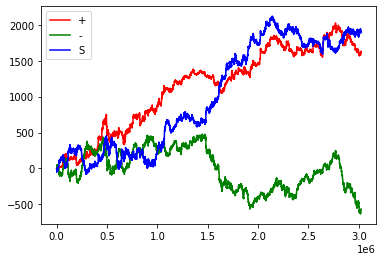

TXB_PLUS_DM


,RMean,sharpRatio,WinRate
0,0.11,0.02,0.52
1,0.05,0.01,0.51
2,0.01,0.00,0.50


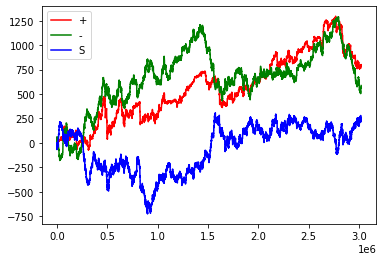

TXB_MINUS_DI


,RMean,sharpRatio,WinRate
0,0.25,0.04,0.51
1,-0.11,-0.02,0.50
2,0.17,0.03,0.51


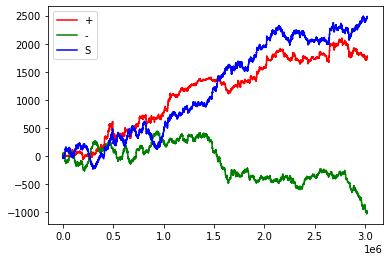

TXB_PLUS_DI


,RMean,sharpRatio,WinRate
0,0.11,0.02,0.52
1,-0.01,-0.00,0.51
2,0.07,0.01,0.50


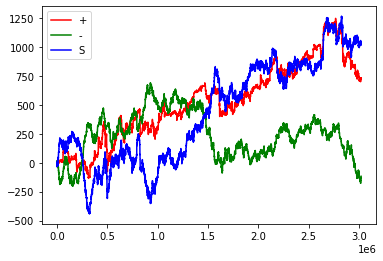

TXB_ADX


,RMean,sharpRatio,WinRate
0,-0.05,-0.01,0.51
1,0.12,0.02,0.50
2,-0.09,-0.02,0.50


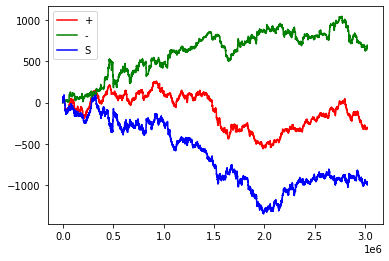

TXB_ADXR


,RMean,sharpRatio,WinRate
0,-0.00,-0.00,0.51
1,0.13,0.02,0.50
2,-0.05,-0.01,0.50


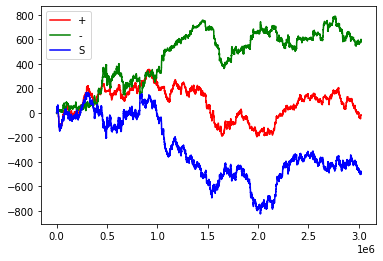

TXB_MACD_macdhist


,RMean,sharpRatio,WinRate
0,-0.00,-0.00,0.50
1,0.22,0.04,0.52
2,-0.13,-0.02,0.49


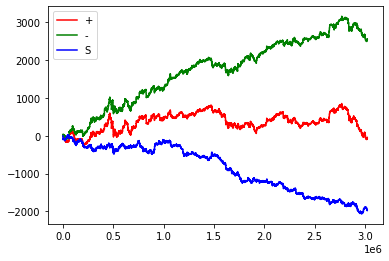

In [41]:
y_idx="ORM5"
span=120
tick_quant=0.05
for x_idx in x_idxs2:
    print(x_idx)
    simple_test(x_idx,y_idx,span=span,tick_quant=tick_quant)

In [46]:
df["TXB_PLUS_DM"]

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
3022578    0.699222
3022579    1.649277
3022580    1.531472
3022581    2.422081
3022582    2.249075
Name: TXB_PLUS_DM, Length: 3022583, dtype: float64

In [62]:
df[["TXB_MINUS_DM","TXB_PLUS_DM","high","low"]].iloc[40:200]

,TXB_MINUS_DM,TXB_PLUS_DM,high,low
40,NaN,NaN,3735.0,3734.0
41,NaN,NaN,3736.0,3735.0
42,NaN,NaN,3736.0,3734.0
43,NaN,NaN,3736.0,3735.0
44,NaN,NaN,3737.0,3735.0
45,NaN,NaN,3738.0,3735.0
46,NaN,NaN,3737.0,3735.0
47,NaN,NaN,3736.0,3735.0
48,NaN,NaN,3736.0,3735.0
49,NaN,NaN,3736.0,3735.0


In [49]:
df[["TXB_MINUS_DM","TXB_PLUS_DM","high","low"]].iloc[40:200]

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
3022578   -2.517800
3022579   -2.340190
3022580   -2.331379
3022581   -2.155684
3022582   -1.993865
Length: 3022583, dtype: float64

In [47]:
df[x_idxs2+["TXB_ATR"]]

,TXB_MINUS_DM,TXB_PLUS_DM,TXB_MINUS_DI,TXB_PLUS_DI,TXB_ADX,TXB_ADXR,TXB_MACD_macdhist,TXB_ATR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3022578,0.415426,0.699222,2.927674,4.927702,35.920236,36.657162,0.113463,1.013544
3022579,0.385752,1.649277,2.721152,11.634237,37.789418,38.397954,0.102263,1.012576
3022580,0.358199,1.531472,2.710906,11.590431,39.525086,40.014403,0.087104,0.943803
3022581,0.332613,2.422081,2.506609,18.253076,42.119808,42.006907,0.076893,0.947817


In [42]:
df[[""]]

,TradingDay,time,Session,open,close,high,low,volume,amt,exch_detail,...,TXMA_sma_960,TXMA_ema_960,TXMA_sma_1200,TXMA_ema_1200,TXMA_sma_1800,TXMA_ema_1800,TXMA_sma_2400,TXMA_ema_2400,TXMA_sma_3600,TXMA_ema_3600
0,2022-12-01,-10799.5,night,3738.0,3736.420502,3739.0,3736.0,NaN,NaN,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-01,-10799.0,night,3738.0,3737.972603,3739.0,3736.0,1778.0,6645904.0,"{3737: 0, 3738: 754, 3736: 428.0, 3739: 596.0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-01,-10798.5,night,3738.0,3738.908451,3739.0,3738.0,575.0,2149577.0,"{3738: 348.0, 3739: 227.0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-01,-10798.0,night,3738.0,3738.994048,3739.0,3738.0,359.0,1342177.0,"{3738: 124.0, 3739: 235.0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-01,-10797.5,night,3739.0,3738.201264,3740.0,3738.0,633.0,2366654.0,"{3739: 1, 3738: 382.0, 3740: 250.0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022578,2023-03-22,53998.0,day3,4151.0,4152.128492,4152.0,4151.0,29.0,120392.0,"{4151: 16.0, 4152: 13.0}",...,0.242967,-1.193316,-0.231170,-1.411569,-2.223127,-2.192368,-3.640085,-3.123946,-4.078444,-5.086988
3022579,2023-03-22,53998.5,day3,4153.0,4152.049751,4153.0,4152.0,169.0,701809.0,"{4152: 48.0, 4153: 121.0}",...,0.322270,-1.112256,-0.149332,-1.330609,-2.141373,-2.111281,-3.558171,-3.042669,-3.997954,-5.005466
3022580,2023-03-22,53999.0,day3,4152.0,4152.025510,4152.0,4152.0,16.0,66432.0,{4152: 16.0},...,0.347059,-1.085750,-0.122013,-1.304193,-2.114129,-2.084722,-3.530752,-3.015913,-3.971989,-4.978458
3022581,2023-03-22,53999.5,day3,4152.0,4152.108359,4153.0,4152.0,34.0,141171.0,"{4152: 31.0, 4153: 3.0}",...,0.264819,-1.166167,-0.201707,-1.384732,-2.193904,-2.165164,-3.610380,-3.096181,-4.053205,-5.058496


In [ ]:
CCI 14,25,60,120
AROONOSC 14,25,60,120

TXB_CCI


,RMean,sharpRatio,WinRate
0,-0.06,-0.01,0.50
1,0.20,0.04,0.52
2,-0.14,-0.03,0.49


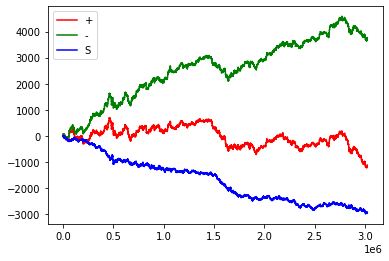

TXB_AROONOSC


,RMean,sharpRatio,WinRate
0,-0.02,-0.00,0.51
1,0.21,0.04,0.52
2,-0.16,-0.03,0.49


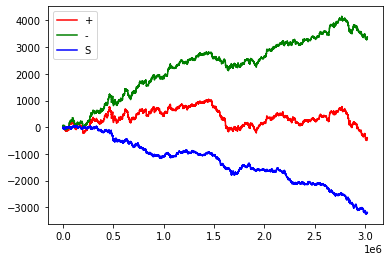

TXB_DEMA


,RMean,sharpRatio,WinRate
0,0.26,0.05,0.52
1,-0.01,-0.00,0.50
2,0.15,0.03,0.51


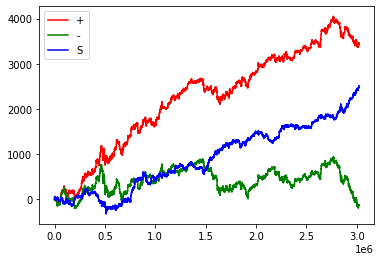

TXB_SAREXT


,RMean,sharpRatio,WinRate
0,-0.33,-0.07,0.49
1,0.05,0.01,0.51
2,-0.09,-0.02,0.49


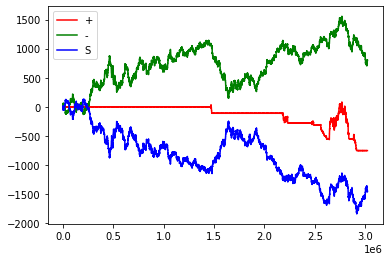

TXB_TEMA


,RMean,sharpRatio,WinRate
0,0.23,0.04,0.52
1,-0.02,-0.00,0.50
2,0.12,0.02,0.51


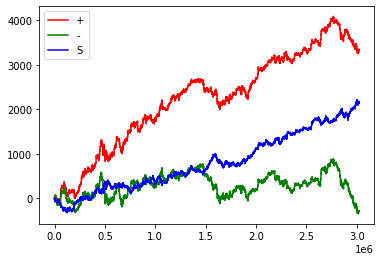

TXB_T3


,RMean,sharpRatio,WinRate
0,0.23,0.04,0.52
1,-0.02,-0.00,0.50
2,0.14,0.03,0.51


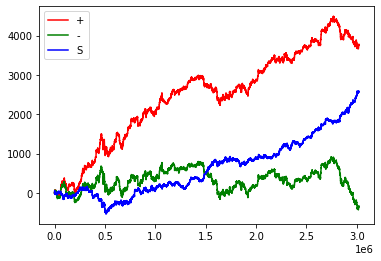

TXB_CDLBELTHOLD


,RMean,sharpRatio,WinRate
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


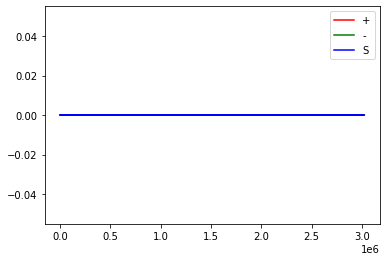

TXB_CDLCLOSINGMARUBOZU


,RMean,sharpRatio,WinRate
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


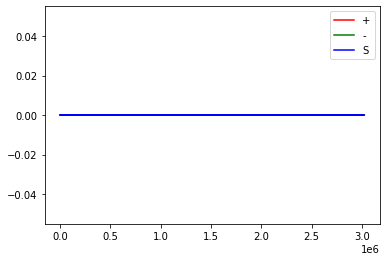

TXB_CDLCOUNTERATTACK


,RMean,sharpRatio,WinRate
0,0.18,0.03,0.52
1,0.09,0.02,0.51
2,0.02,0.00,0.51


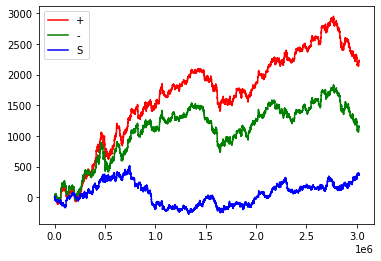

TXB_CDLGAPSIDESIDEWHITE


,RMean,sharpRatio,WinRate
0,0.02,0.00,0.51
1,0.07,0.01,0.51
2,0.00,0.00,0.50


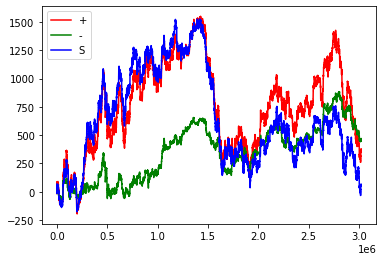

TXB_CDLRISEFALL3METHODS


,RMean,sharpRatio,WinRate
0,-1.80,-0.82,0.25
1,2.06,0.41,0.78
2,-1.98,-0.46,0.23


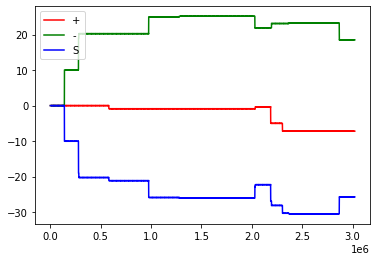

TXB_MACD_macdhist


,RMean,sharpRatio,WinRate
0,-0.00,-0.00,0.50
1,0.22,0.04,0.52
2,-0.13,-0.02,0.49


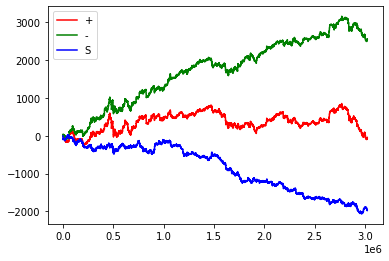

TXB_MACDEXT_macdhist


,RMean,sharpRatio,WinRate
0,0.07,0.01,0.51
1,0.17,0.03,0.52
2,-0.00,-0.00,0.50


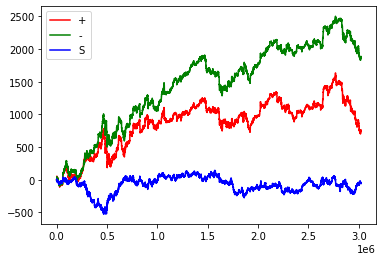

TXB_MACDFIX_macdhist


,RMean,sharpRatio,WinRate
0,-0.00,-0.00,0.50
1,0.22,0.04,0.52
2,-0.10,-0.02,0.49


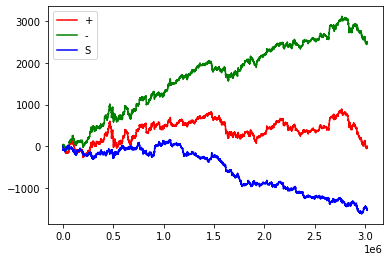

TXB_AROON_aroondown


,RMean,sharpRatio,WinRate
0,0.17,0.03,0.52
1,NaN,NaN,NaN
2,0.17,0.03,0.52


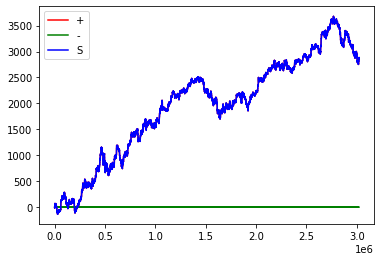

TXB_AROON_aroonup


,RMean,sharpRatio,WinRate
0,-0.0,-0.0,0.51
1,NaN,NaN,NaN
2,-0.0,-0.0,0.51


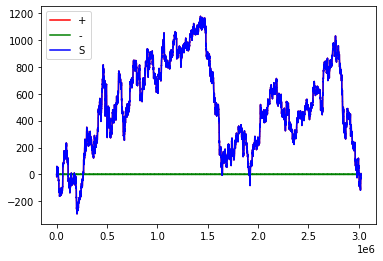

TXB_STOCHRSI_fastk


,RMean,sharpRatio,WinRate
0,NaN,NaN,NaN
1,0.16,0.03,0.52
2,-0.16,-0.03,0.48


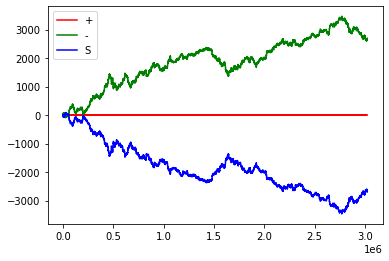

TXB_STOCHRSI_fastd


,RMean,sharpRatio,WinRate
0,-0.03,-0.01,0.50
1,0.33,0.06,0.54
2,-0.17,-0.03,0.48


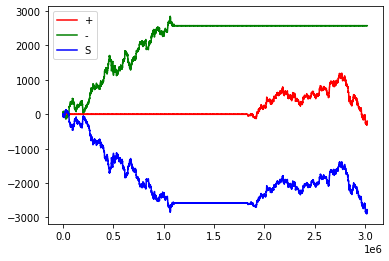

TXB_BBANDS_middleband


,RMean,sharpRatio,WinRate
0,0.22,0.04,0.52
1,-0.03,-0.01,0.50
2,0.14,0.03,0.51


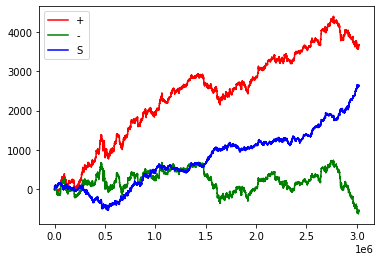

TXB_BBANDS_lowerband


,RMean,sharpRatio,WinRate
0,0.23,0.04,0.52
1,-0.01,-0.00,0.50
2,0.09,0.02,0.51


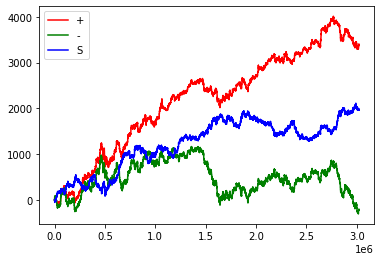

In [28]:
y_idx="ORM5"
span=120
tick_quant=0.05
for x_idx in x_idxs1:
    print(x_idx)
    simple_test(x_idx,y_idx,span=span,tick_quant=tick_quant)